(506, 14)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
RMSE: 3.744482894604089
R² Score: 0.7994424140969885


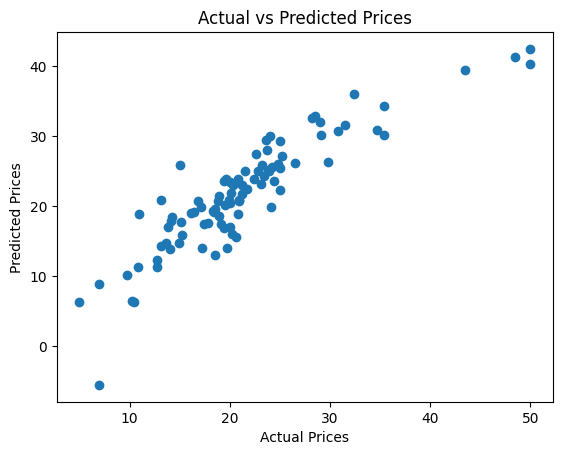

In [35]:
import warnings
warnings.filterwarnings("ignore")

# House Price Prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE","DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

df = pd.read_csv("/kaggle/input/bostonhousing/housing.csv",delim_whitespace=True, names=column_names)


print(df.shape)
print(df.head())
df = df.dropna()  # drop missing values for simplicity

# Features and target
X = df.drop("MEDV", axis=1)  # MEDV = Median value of homes
y = df["MEDV"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # The average error of our model's predictions, in dollars.
r2 = r2_score(y_test, y_pred) # A score from 0 to 1, where 1.0 is a perfect prediction.

print("RMSE:", rmse)
print("R² Score:", r2)

# Visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()
